# Predicting Phishing Web Page Using Machine Learning

Phishing is a method of trying to gather personal information using deceptive e-mails and websites.

In this notebook, we will read the data and look at what are the features that can give us information on what are the attributes of a phishing website

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = (12,6)

# Loading the data

We will start by loading the provided csv data using pandas read_csv method

In [6]:
data = pd.read_csv("./dataset_full.csv")

In [7]:
data.head(10)

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_slash_domain,qty_questionmark_domain,qty_equal_domain,qty_at_domain,qty_and_domain,qty_exclamation_domain,qty_space_domain,qty_tilde_domain,qty_comma_domain,qty_plus_domain,qty_asterisk_domain,qty_hashtag_domain,qty_dollar_domain,qty_percent_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,qty_questionmark_directory,qty_equal_directory,qty_at_directory,qty_and_directory,qty_exclamation_directory,qty_space_directory,qty_tilde_directory,qty_comma_directory,qty_plus_directory,qty_asterisk_directory,qty_hashtag_directory,qty_dollar_directory,qty_percent_directory,directory_length,qty_dot_file,qty_hyphen_file,qty_underline_file,qty_slash_file,qty_questionmark_file,qty_equal_file,qty_at_file,qty_and_file,qty_exclamation_file,qty_space_file,qty_tilde_file,qty_comma_file,qty_plus_file,qty_asterisk_file,qty_hashtag_file,qty_dollar_file,qty_percent_file,file_length,qty_dot_params,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_questionmark_params,qty_equal_params,qty_at_params,qty_and_params,qty_exclamation_params,qty_space_params,qty_tilde_params,qty_comma_params,qty_plus_params,qty_asterisk_params,qty_hashtag_params,qty_dollar_params,qty_percent_params,params_length,tld_present_params,qty_params,email_in_url,time_response,domain_spf,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,17,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.207316,0,60781,-1,-1,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,0,0,0,0,0,0,0,3,223,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,16,0,0,3,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,42,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,1,0,0,3,0,2,0,0,0,0,0,0,0,0,0,165,0,3,0,0.499566,-1,36024,579,150,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,15,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,14,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.935901,0,4766,-1,-1,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,81,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,19,0,0,2,0,2,5,0,0,0,0,0,0,0,0,0,0,0,0,0,62,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.410021,0,20454,-1,-1,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,19,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,19,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.410761,0,53831,6998,306,1,2,1,3597,0,1,0,0,0,0
5,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,22,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,17,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.458436,-1,25535,9,355,1,3,3,3591,1,0,0,0,0,1
6,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,27,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,27,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.710173,0,13446,-1,-1,1,2,2,291,0,0,0,0,0,0
7,2,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,46,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,28,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,

In [8]:
df= data.copy()

In [9]:
data_info_dict=dict()
data_info_dict['columns']= df.columns.tolist()
data_info_dict['dtypes']= df.dtypes.values.tolist()
data_info_dict['unique_values']=df.nunique()

df1=pd.DataFrame(data_info_dict).reset_index(drop=True)

In [10]:
df1=df1.sort_values(by='unique_values',ascending=True).reset_index(drop=True)
df1

,columns,dtypes,unique_values
0,qty_asterisk_domain,int64,1
1,qty_equal_domain,int64,1
2,qty_and_domain,int64,1
3,qty_exclamation_domain,int64,1
4,qty_space_domain,int64,1
...,...,...,...
107,time_domain_expiration,int64,3093
108,asn_ip,int64,3638
109,time_domain_activation,int64,8790
110,ttl_hostname,int64,10171


In [11]:
one_val_cols=list(df1[df1['unique_values']==1]['columns'].values) # replace 1 with any number to get column with that many unique values

In [12]:
df.corrwith(df['phishing'])[one_val_cols]

qty_asterisk_domain       NaN
qty_equal_domain          NaN
qty_and_domain            NaN
qty_exclamation_domain    NaN
qty_space_domain          NaN
qty_tilde_domain          NaN
qty_comma_domain          NaN
qty_plus_domain           NaN
qty_hashtag_domain        NaN
qty_questionmark_domain   NaN
qty_dollar_domain         NaN
qty_percent_domain        NaN
qty_slash_domain          NaN
dtype: float64

In [13]:
df.drop(columns=one_val_cols,inplace=True)

#### Columns with only one unique value have no correlation with the target column.. So lets drop that

# Summary Statistics

By using the describe method, we can see some of the columns have high variance and some have smaller variance, this is due to the fact that some of the column have bigger values and bigger ranges

In [14]:
data.describe()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_slash_domain,qty_questionmark_domain,qty_equal_domain,qty_at_domain,qty_and_domain,qty_exclamation_domain,qty_space_domain,qty_tilde_domain,qty_comma_domain,qty_plus_domain,qty_asterisk_domain,qty_hashtag_domain,qty_dollar_domain,qty_percent_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,qty_questionmark_directory,qty_equal_directory,qty_at_directory,qty_and_directory,qty_exclamation_directory,qty_space_directory,qty_tilde_directory,qty_comma_directory,qty_plus_directory,qty_asterisk_directory,qty_hashtag_directory,qty_dollar_directory,qty_percent_directory,directory_length,qty_dot_file,qty_hyphen_file,qty_underline_file,qty_slash_file,qty_questionmark_file,qty_equal_file,qty_at_file,qty_and_file,qty_exclamation_file,qty_space_file,qty_tilde_file,qty_comma_file,qty_plus_file,qty_asterisk_file,qty_hashtag_file,qty_dollar_file,qty_percent_file,file_length,qty_dot_params,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_questionmark_params,qty_equal_params,qty_at_params,qty_and_params,qty_exclamation_params,qty_space_params,qty_tilde_params,qty_comma_params,qty_plus_params,qty_asterisk_params,qty_hashtag_params,qty_dollar_params,qty_percent_params,params_length,tld_present_params,qty_params,email_in_url,time_response,domain_spf,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
count,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.0,88647.0,88647.0,88647.000000,88647.0,88647.0,88647.0,88647.0,88647.0,88647.0,88647.0,88647.0,88647.0,88647.0,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.00000,88647.000000,88647.000000,88647.000000
mean,2.191343,0.328810,0.113879,1.281781,0.009329,0.205861,0.022133,0.140885,0.002944,0.001015,0.003226,0.002166,0.002786,0.004535,0.000508,0.001895,0.107505,1.047480,36.347615,1.870622,0.114578,0.000756,0.0,0.0,0.0,0.000011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.440590,18.560820,0.002267,0.004501,-0.323666,-0.360813,-0.477997,0.713685,-0.535935,-0.528343,-0.532550,-0.531422,-0.534310,-0.535145,-0.532765,-0.535224,-0.534863,-0.532235,-0.535935,-0.534626,-0.483457,10.857694,-0.368710,-0.478087,-0.510756,-0.535935,-0.535935,-0.534288,-0.535641,-0.534513,-0.534897,-0.535506,-0.535641,-0.535371,-0.535168,-0.534761,-0.535935,-0.535935,-0.498742,2.743793,-0.811093,-0.878608,-0.862251,-0.88

# Balance/Imbalanced Data

The data is balanced for non-phising and phising label

<AxesSubplot: >

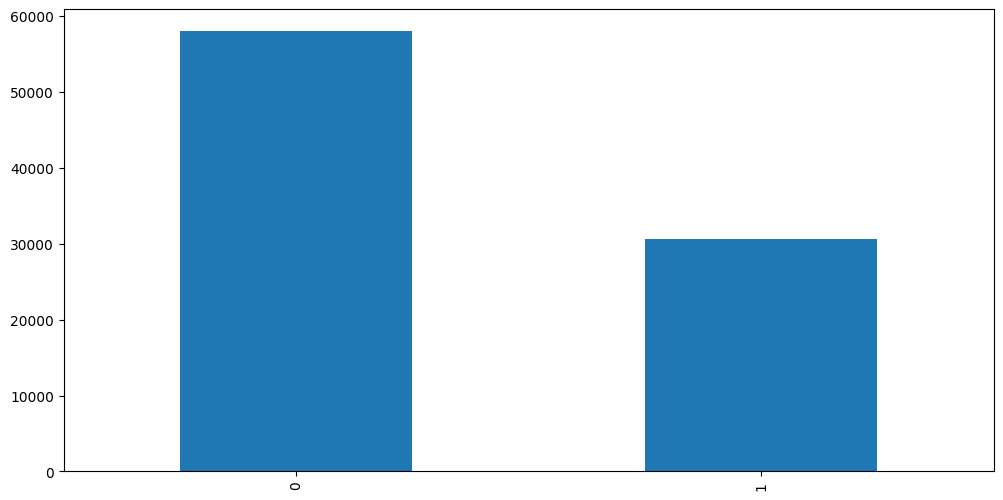

In [15]:
data['phishing'].value_counts().plot(kind='bar')

# Spearman Correlation

By looking the spearman correlation, we can find which features are linearly correlated in terms of predicting if a site is phising or not

In [16]:


def corr_heatmap(dataframe, start_index, stop_index):
    target = dataframe['phishing']
    temp_df = dataframe.iloc[:, start_index:stop_index]
    
    temp_df['labels'] = target
    sns.heatmap(temp_df.corr(), annot=True, fmt='.2f')
    plt.show()

# First 10 columns
#### qty_slash_url has strong positive correlation with target column

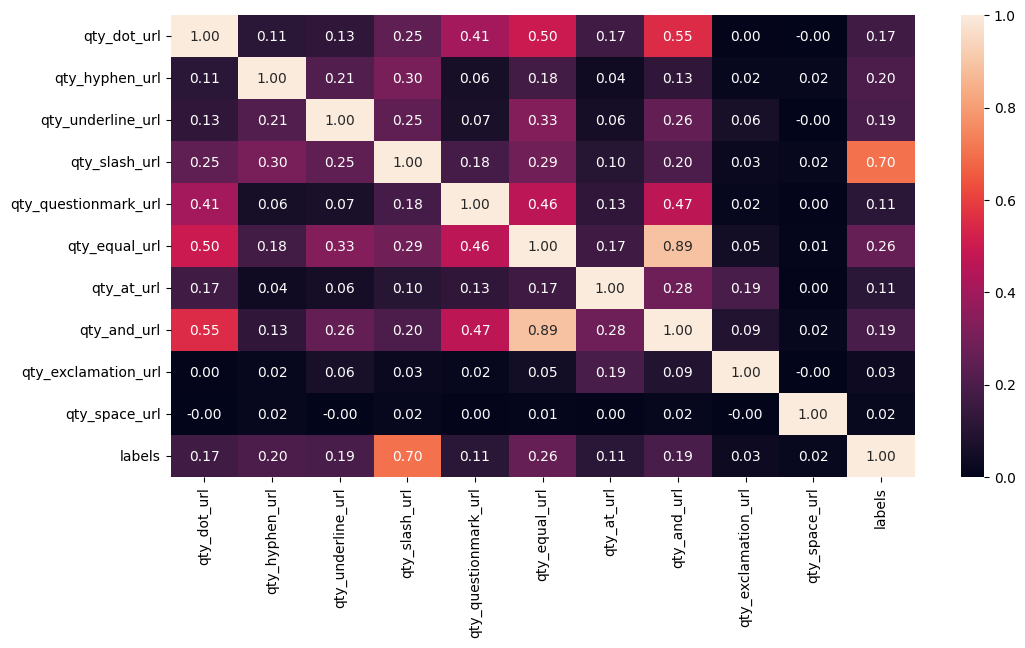

In [17]:
corr_heatmap(df, 0, 10)

# Columns 10 to 20

-qty_dot_domain has -ve correlation with target

-len_url is looking decent

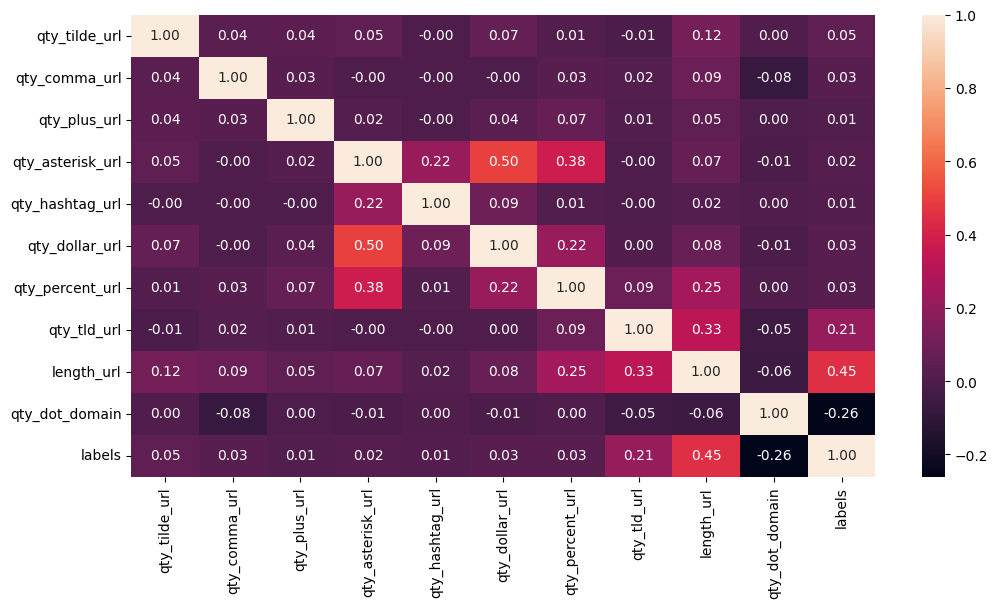

In [18]:
corr_heatmap(df, 10, 20)

# Columns 20 to 30

#### qty_dot_directory and qty_underline_directory are +vely related

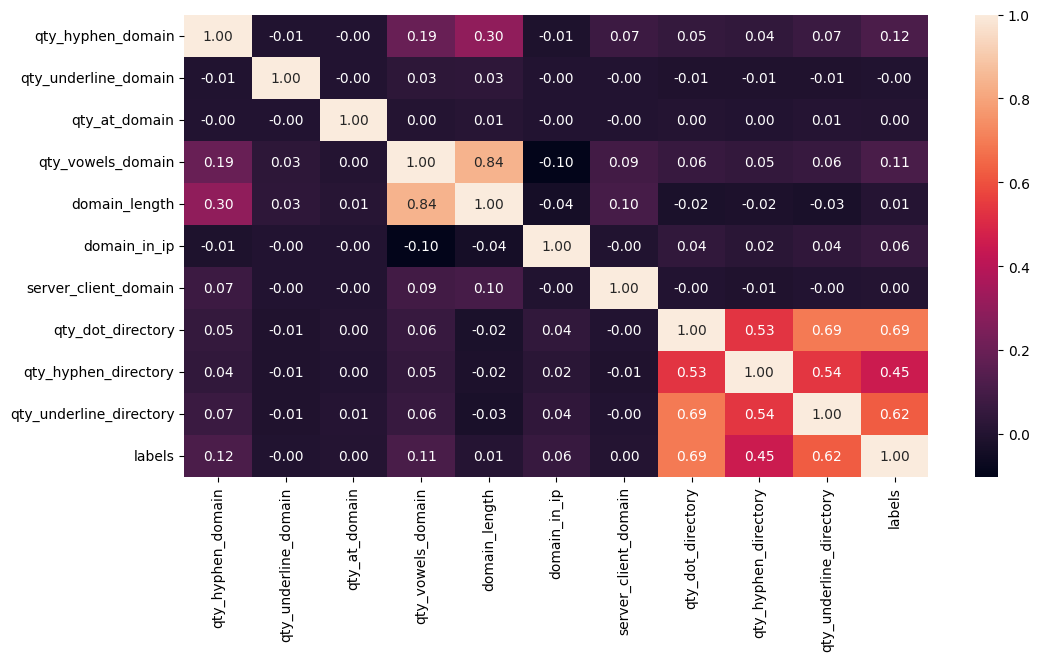

In [19]:
corr_heatmap(df, 20, 30)

# Columns 30 to 40

still weakly related columns

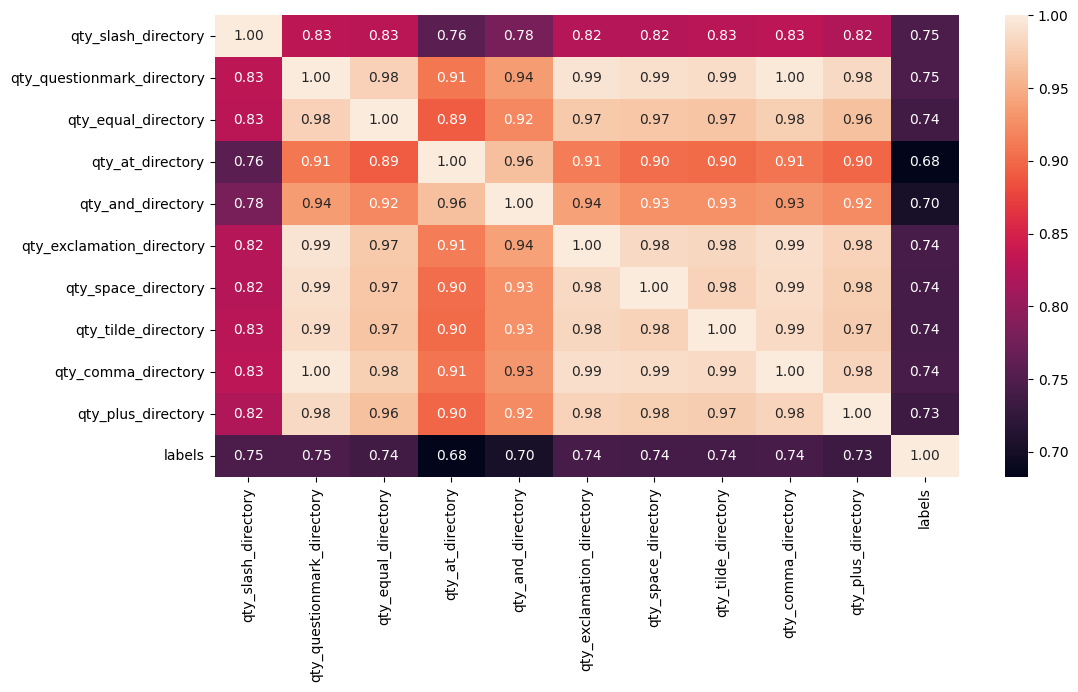

In [20]:
corr_heatmap(df, 30, 40)

# Columsn 40 to 50


* Lots of +ve strongly correlated feat


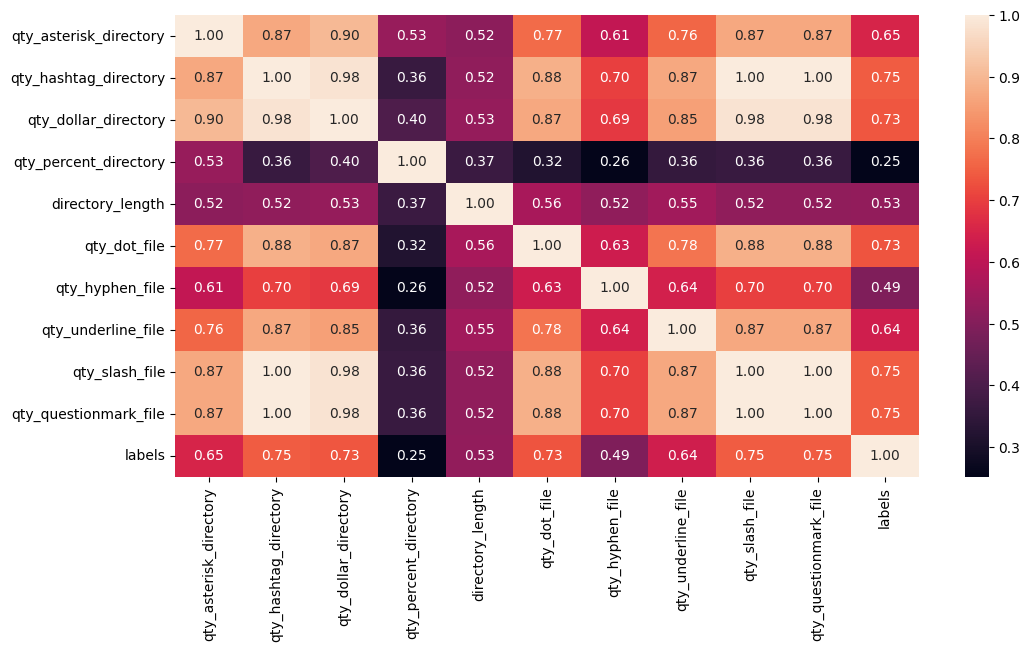

In [21]:
corr_heatmap(df, 40, 50)

# Columsn 50 to 60

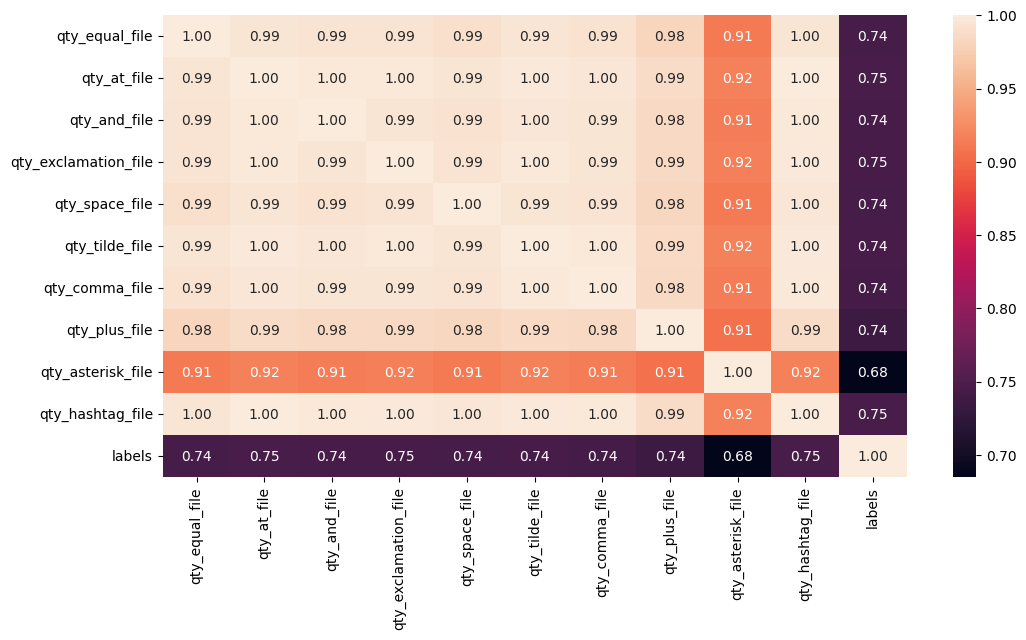

In [22]:
corr_heatmap(df, 50, 60)


# Columsn 60 to 70

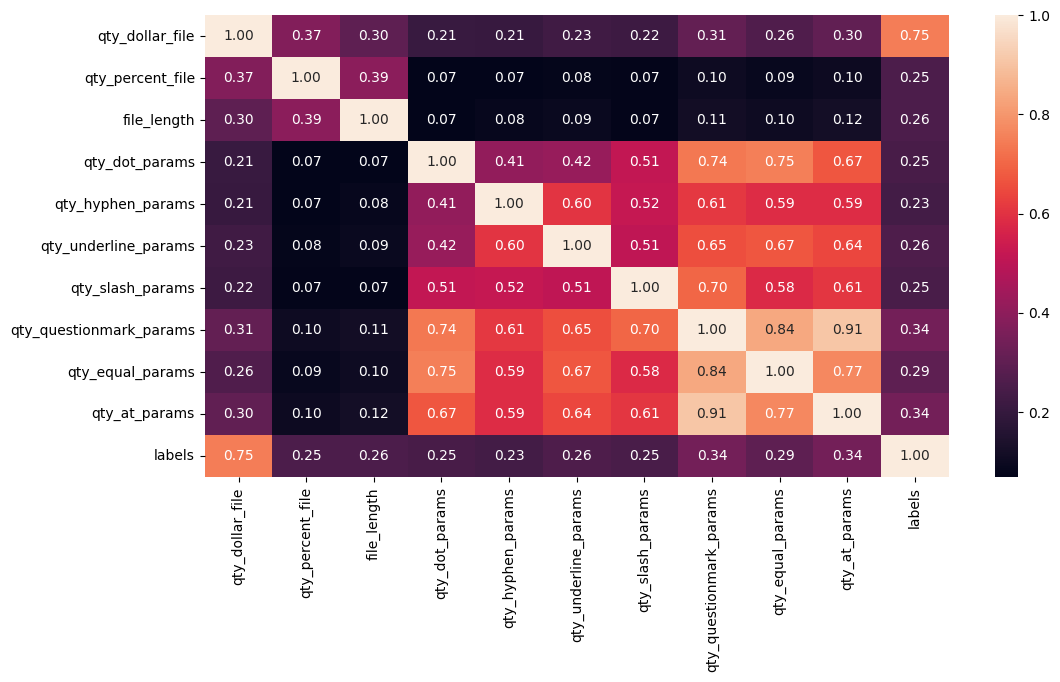

In [23]:
corr_heatmap(df, 60, 70)

# Columsn 70 to 80

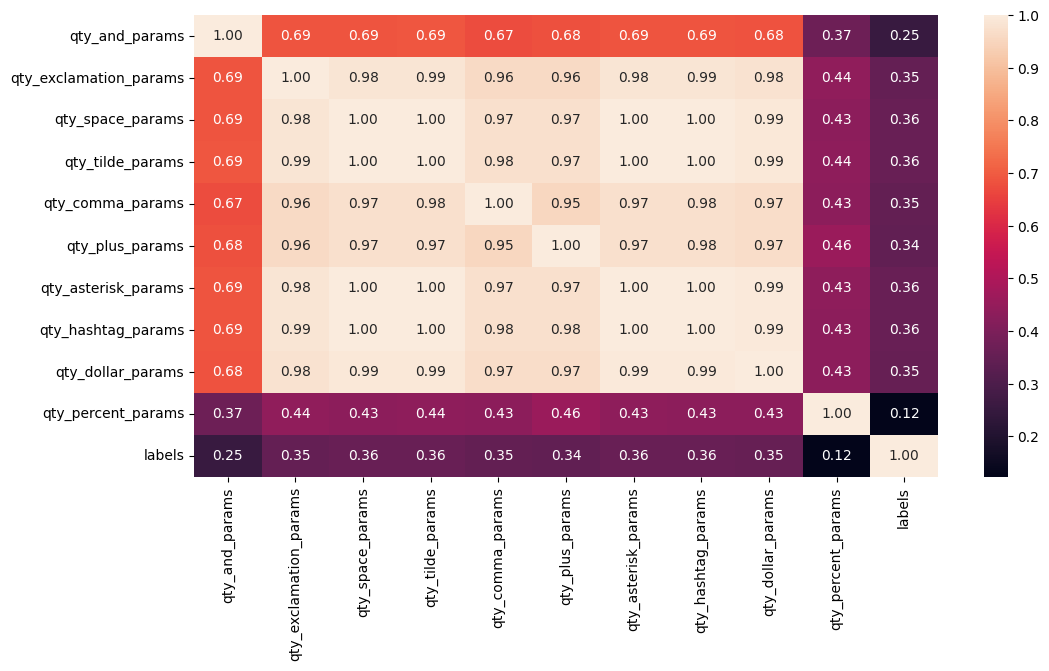

In [24]:
corr_heatmap(df, 70, 80)

# Columsn 80 to 90

### time_domain_activation has some significant negative effect towards the labels, which could mean if there is lesser time after the domain has been activated.. then it is more likely to be phising site

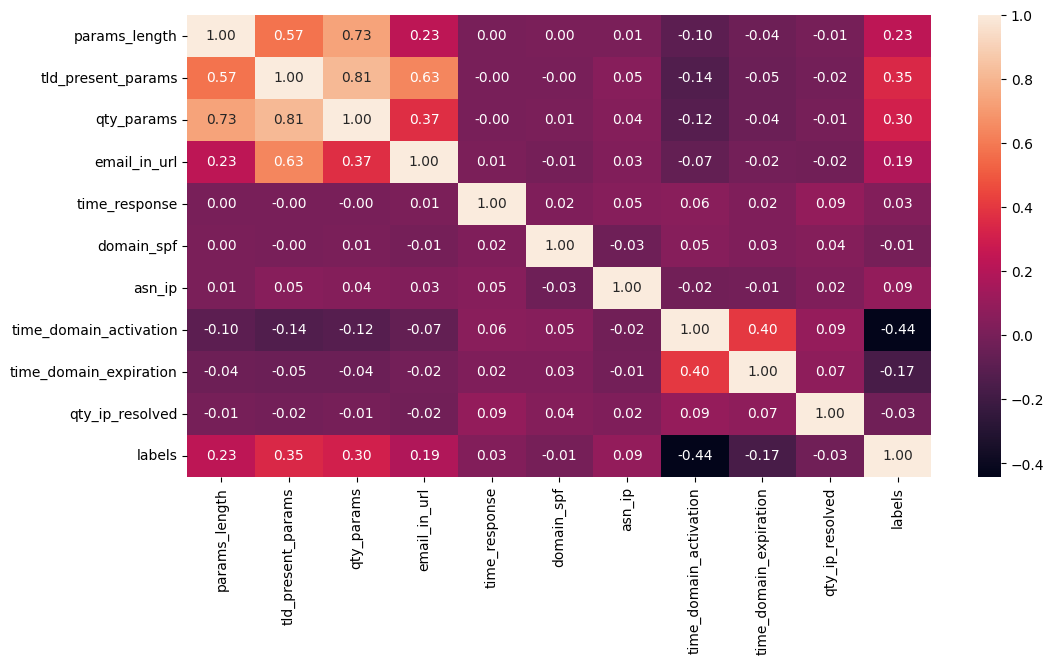

In [25]:
corr_heatmap(df, 80, 90)

# Columsn 90 to 100

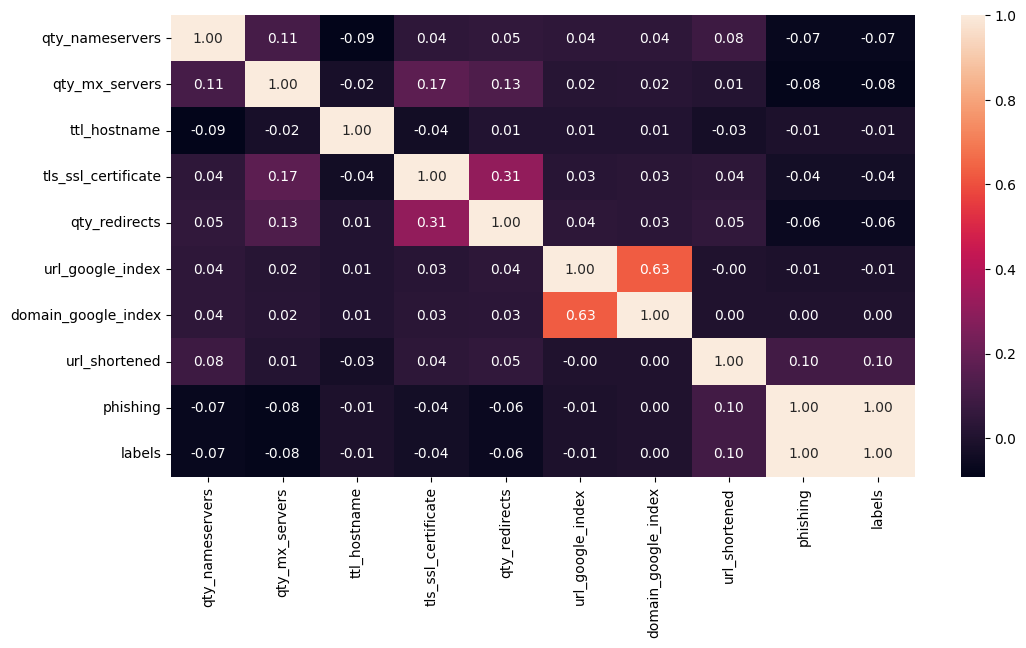

In [26]:
corr_heatmap(df, 90, 100)

In [73]:
def colleration_m(df,threshold):
    corelated_col=set()
    corr_matrix=df.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range (i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                corelated_col.add(colname)
                
    return corelated_col

In [74]:
df1 = df.iloc[:,:-1]
cor_cols = colleration_m(df1,0.97)

In [76]:
df.drop(columns=list(cor_cols), inplace=True)

# Feature selection using Mutual Info

We will use mutual info classifier to find non linear and linear correlation betweem the features and labels

In [34]:
from sklearn.feature_selection import mutual_info_classif

In [38]:
df.drop_duplicates()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_at_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,qty_questionmark_directory,qty_equal_directory,qty_at_directory,qty_and_directory,qty_exclamation_directory,qty_space_directory,qty_tilde_directory,qty_comma_directory,qty_plus_directory,qty_asterisk_directory,qty_hashtag_directory,qty_dollar_directory,qty_percent_directory,directory_length,qty_dot_file,qty_hyphen_file,qty_underline_file,qty_slash_file,qty_questionmark_file,qty_equal_file,qty_at_file,qty_and_file,qty_exclamation_file,qty_space_file,qty_tilde_file,qty_comma_file,qty_plus_file,qty_asterisk_file,qty_hashtag_file,qty_dollar_file,qty_percent_file,file_length,qty_dot_params,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_questionmark_params,qty_equal_params,qty_at_params,qty_and_params,qty_exclamation_params,qty_space_params,qty_tilde_params,qty_comma_params,qty_plus_params,qty_asterisk_params,qty_hashtag_params,qty_dollar_params,qty_percent_params,params_length,tld_present_params,qty_params,email_in_url,time_response,domain_spf,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25,2,0,0,0,4,17,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.207316,0,60781,-1,-1,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,0,0,0,0,0,0,0,3,223,2,0,0,0,5,16,0,0,3,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,42,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,1,0,0,3,0,2,0,0,0,0,0,0,0,0,0,165,0,3,0,0.499566,-1,36024,579,150,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,15,2,0,0,0,3,14,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.935901,0,4766,-1,-1,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,81,2,0,0,0,7,19,0,0,2,0,2,5,0,0,0,0,0,0,0,0,0,0,0,0,0,62,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.410021,0,20454,-1,-1,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,19,2,0,0,0,5,19,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.410761,0,53831,6998,306,1,2,1,3597,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88642,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,23,3,1,0,0,5,23,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.135186,0,8560,5509,334,1,3,1,3597,0,0,0,0,0,0
88643,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,34,2,0,0,0,14,34,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.397981,0,26496,5046,431,1,2,2,591,0,2,0,0,0,0
88644,2,1,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,70,1,0,0,0,6,22,0,0,1,1,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,48,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,-1,-1,-1,-1,-1,-1,-1

In [39]:
df=df.reset_index(drop=True)

In [78]:
X = df.drop(['phishing'], axis=1)
y = df['phishing']

In [82]:
discrete_features = X.dtypes == int

Here we process the scores and we can see that now mutual info is showing a bit different list from spearman corr

In [83]:
mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
mi_scores = pd.Series(mi_scores, name='MI Scores', index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)
useful_cols=list(mi_scores[:41].index)

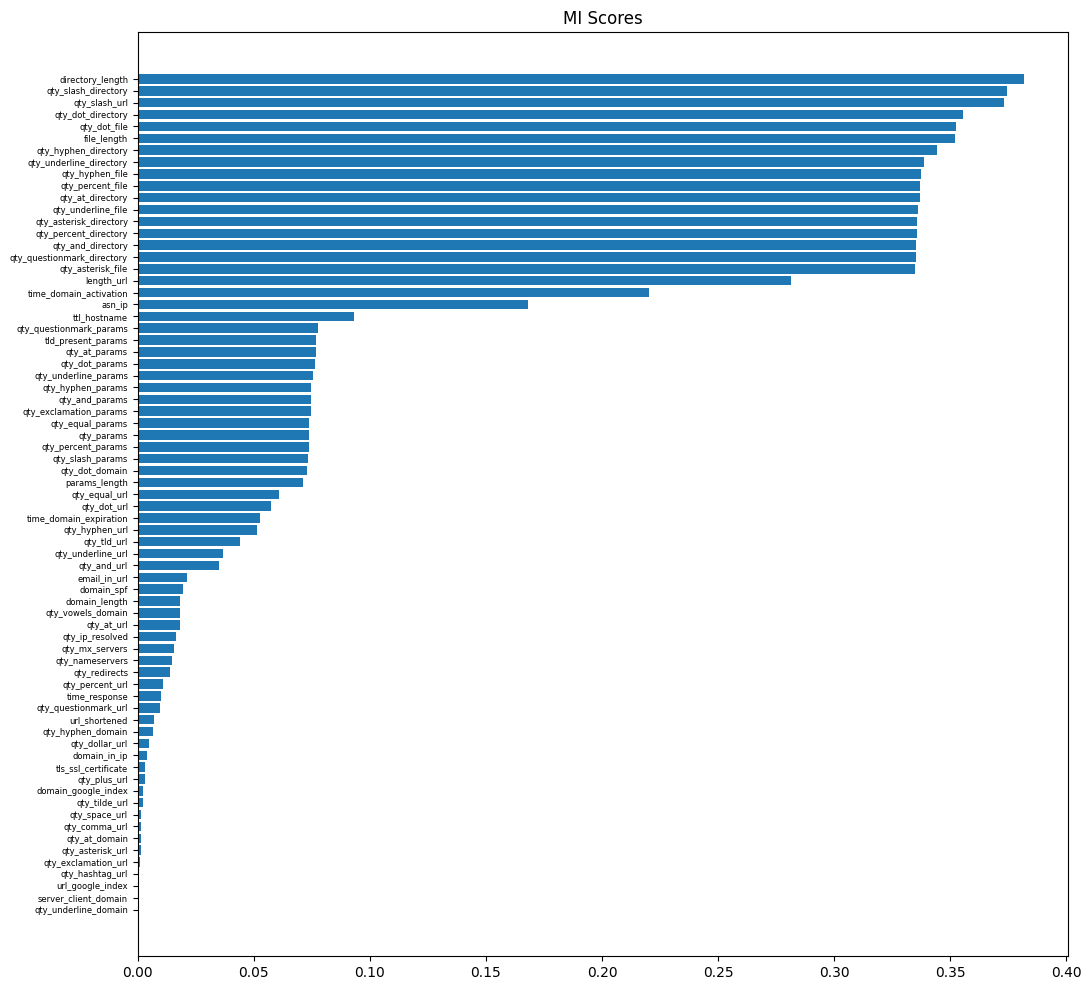

In [84]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(fontsize=6)
    plt.yticks(width, ticks)
    plt.title("MI Scores")
    
plt.figure(dpi=100, figsize=(12,12))
plot_mi_scores(mi_scores)

# Prediction

We will first use logistic regression as for baseline, then try to beat the baseline using random forest classifer

Our evaluation metrics will be accuracy, precision, recall and f1 score

Below we import all the required modules

In [46]:
df1=df.nunique().sort_values(ascending=True).reset_index()
df1.columns=['columns','unique_values']

In [47]:
df1

,columns,unique_values
0,qty_questionmark_file,2
1,tls_ssl_certificate,2
2,email_in_url,2
3,qty_hashtag_params,2
4,qty_dollar_file,2
...,...,...
94,time_domain_expiration,3093
95,asn_ip,3638
96,time_domain_activation,8790
97,ttl_hostname,10171


In [48]:
low_cardinality_features=df1[(df1['unique_values'] <10)]['columns'].tolist()
low_cardinality_features.remove('phishing')
high_cardinality_features=df1[(df1['unique_values'] >= 10) & (df1['unique_values'] <=20)]['columns'].tolist()
numeric_features=df1[(df1['unique_values'] > 20)]['columns'].tolist()

In [49]:
len(low_cardinality_features)

46

In [50]:
len(high_cardinality_features)

28

In [51]:
len(numeric_features)

24

## Train test split

In [86]:

from sklearn.model_selection import  train_test_split
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

from sklearn.feature_selection import f_classif

In [56]:
# X=df[useful_cols]
# y=df['phishing']

In [89]:
resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X, y = resample.fit_resample(X,y)

In [90]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.25)

# Robust Scaling

In [118]:
from sklearn.preprocessing import RobustScaler

In [119]:
rc =RobustScaler()
X_train_scale = rc.fit_transform(X_train)
X_test_scale = rc.transform(X_test)

## Model Building


In [91]:
def evaluate_clf(true, predicted):
    '''
    This function takes in true values and predicted values
    Returns: Accuracy, F1-Score, Precision, Recall, Roc-auc Score
    '''
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    tn, fp, fn, tp =confusion_matrix(true, predicted).ravel()
    return acc, f1 , precision, recall, roc_auc, fp,fn

In [92]:
def evaluate_models(X_train, X_test, y_train, y_test, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    #X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    #cost_list=[]
    models_list = []
    test_fp_list = []
    test_fn_list = []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score, train_fp,train_fn=evaluate_clf(y_train ,y_train_pred)
        #train_cost = total_cost(y_train, y_train_pred)
        
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score,test_fp,test_fn=evaluate_clf(y_test, y_test_pred)
        #test_cost = total_cost(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
        print(f'- Error: {train_fp+train_fn}.')

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        print(f'- Error: {test_fp+test_fn}.')
        test_fp_list.append(test_fp)
        test_fn_list.append(test_fn)
        print('='*35)
        print('\n')
    report=pd.DataFrame(list(zip(models_list, test_fp_list, test_fn_list)), columns=['Model Name', 'False Positive', 'False Negative']).sort_values(by=["False Positive"])
    return report


In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix


from sklearn import metrics 
from sklearn.model_selection import  train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from xgboost import XGBClassifier
from catboost import CatBoostClassifier


In [94]:
# Dictionary which contains models for experiment
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier()
}

# Performance

Main Metric of measure:
* False Positive rate: To avoid blacklisting genuine users

In [95]:
report_models = evaluate_models(X_train,X_test,y_train,y_test, models)

Random Forest
Model performance for Training set
- Accuracy: 0.9999
- F1 score: 0.9999
- Precision: 0.9999
- Recall: 0.9999
- Roc Auc Score: 0.9999
- Error: 7.
----------------------------------
Model performance for Test set
- Accuracy: 0.9789
- F1 score: 0.9790
- Precision: 0.9756
- Recall: 0.9824
- Roc Auc Score: 0.9788
- Error: 606.


Decision Tree
Model performance for Training set
- Accuracy: 0.9999
- F1 score: 0.9999
- Precision: 1.0000
- Recall: 0.9999
- Roc Auc Score: 0.9999
- Error: 7.
----------------------------------
Model performance for Test set
- Accuracy: 0.9650
- F1 score: 0.9651
- Precision: 0.9649
- Recall: 0.9653
- Roc Auc Score: 0.9650
- Error: 1003.


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9594
- F1 score: 0.9604
- Precision: 0.9509
- Recall: 0.9701
- Roc Auc Score: 0.9592
- Error: 3490.
----------------------------------
Model performance for Test set
- Accuracy: 0.9597
- F1 score: 0.9601
- Precision: 0.9517
- Recall: 0.9687
- Roc Auc

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
Model performance for Training set
- Accuracy: 0.9056
- F1 score: 0.9054
- Precision: 0.9214
- Recall: 0.8901
- Roc Auc Score: 0.9059
- Error: 8112.
----------------------------------
Model performance for Test set
- Accuracy: 0.9065
- F1 score: 0.9049
- Precision: 0.9233
- Recall: 0.8872
- Roc Auc Score: 0.9066
- Error: 2679.


K-Neighbors Classifier
Model performance for Training set
- Accuracy: 0.9311
- F1 score: 0.9333
- Precision: 0.9179
- Recall: 0.9492
- Roc Auc Score: 0.9308
- Error: 5923.
----------------------------------
Model performance for Test set
- Accuracy: 0.9008
- F1 score: 0.9032
- Precision: 0.8845
- Recall: 0.9227
- Roc Auc Score: 0.9008
- Error: 2842.


XGBClassifier
Model performance for Training set
- Accuracy: 0.9857
- F1 score: 0.9859
- Precision: 0.9848
- Recall: 0.9870
- Roc Auc Score: 0.9856
- Error: 1233.
----------------------------------
Model performance for Test set
- Accuracy: 0.9774
- F1 score: 0.9775
- Precision: 0.9760
- Recall

In [96]:
report_models

,Model Name,False Positive,False Negative
6,CatBoosting Classifier,337,298
5,XGBClassifier,346,301
0,Random Forest,353,253
1,Decision Tree,504,499
2,Gradient Boosting,706,450
7,AdaBoost Classifier,961,605
3,Logistic Regression,1059,1620
4,K-Neighbors Classifier,1731,1111


# Hyperparmeter tuning

In [ ]:
parameters_grid=[
    {
        "n_estimators":[100, 150, 200], 
        "max_depth": [5,10,20],
        "max_leaves": [10,20]
    },
    {
        "iterations":[200,400,600],
        "learning_rate":[0.001,0.0001]
    },
    {
        "n_estimators":[150, 200, 250],
        "criterion":['gini', 'entropy'],
        "bootstrap" : [True, False],
        "max_depth":[20,40], 
        "min_samples_split" : [2, 5, 10],
        "max_features":['auto', 'sqrt'],
        "min_samples_leaf" : [1, 2, 4]
    }
]

In [105]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold



In [112]:
models = {
    "XGBClassifier": XGBClassifier(), 
    "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "Random Forest": RandomForestClassifier()
}

In [113]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

In [122]:
for i in range(len(list(models))):
        
        model=GridSearchCV(estimator=list(models.values())[i],param_grid=parameters_grid[i],scoring='f1',cv=skf)
        model.fit(X_train,y_train)
        
        models_list.append(list(models.keys())[i])
        best_params.append(model.best_params_)
        best_estimator.append(model.best_estimator_)
        score_est.append(model.best_score_)
        

In [115]:
fin_mod = {'xgb' : XGBClassifier(max_depth=10, max_leaves=10, n_estimators=150),
          'cat': CatBoostClassifier(iterations=600, learning_rate=0.001),
          'rf':RandomForestClassifier(criterion='gini',max_depth=40,min_samples_split=4,n_estimators=250)}

In [120]:
report_fin = evaluate_models(X_train_scale, X_test_scale, y_train, y_test, fin_mod)

xgb
Model performance for Training set
- Accuracy: 0.9997
- F1 score: 0.9997
- Precision: 0.9998
- Recall: 0.9997
- Roc Auc Score: 0.9997
- Error: 22.
----------------------------------
Model performance for Test set
- Accuracy: 0.9804
- F1 score: 0.9805
- Precision: 0.9789
- Recall: 0.9821
- Roc Auc Score: 0.9804
- Error: 561.


0:	learn: 0.6911531	total: 24ms	remaining: 14.4s
1:	learn: 0.6891058	total: 46.5ms	remaining: 13.9s
2:	learn: 0.6870414	total: 70.3ms	remaining: 14s
3:	learn: 0.6849978	total: 94.5ms	remaining: 14.1s
4:	learn: 0.6830180	total: 123ms	remaining: 14.6s
5:	learn: 0.6811842	total: 145ms	remaining: 14.3s
6:	learn: 0.6791906	total: 166ms	remaining: 14.1s
7:	learn: 0.6771501	total: 188ms	remaining: 13.9s
8:	learn: 0.6751413	total: 209ms	remaining: 13.7s
9:	learn: 0.6730748	total: 231ms	remaining: 13.6s
10:	learn: 0.6712819	total: 252ms	remaining: 13.5s
11:	learn: 0.6692640	total: 273ms	remaining: 13.4s
12:	learn: 0.6672720	total: 295ms	remaining: 13.3s
13:	learn: 0.66

In [121]:
report_fin

,Model Name,False Positive,False Negative
0,xgb,304,257
2,rf,356,258
1,cat,1378,396
